# Final Project

### Preprocessing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv("mobile_price.csv")

In [14]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2.0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
id               3000 non-null int64
battery_power    3000 non-null int64
blue             3000 non-null int64
clock_speed      3000 non-null float64
dual_sim         3000 non-null int64
fc               3000 non-null int64
four_g           3000 non-null int64
int_memory       3000 non-null int64
m_dep            3000 non-null float64
mobile_wt        3000 non-null int64
n_cores          3000 non-null int64
pc               3000 non-null int64
px_height        3000 non-null int64
px_width         3000 non-null int64
ram              3000 non-null int64
sc_h             3000 non-null int64
sc_w             3000 non-null int64
talk_time        3000 non-null int64
three_g          3000 non-null int64
touch_screen     3000 non-null int64
wifi             3000 non-null int64
price_range      2000 non-null float64
dtypes: float64(3), int64(19)
memory usage: 515.8 KB


In [16]:
data.isna().sum()

id                  0
battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

In [19]:
# dropping all rows with 'price_range' column as zero.
data1=data.dropna(axis=0,how='all',subset=['price_range'])
# data1=data.dropna

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 22 columns):
id               2000 non-null int64
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null float64
dtypes: float64(3), int64(19)
memory usage: 359.4 KB


### Visualization

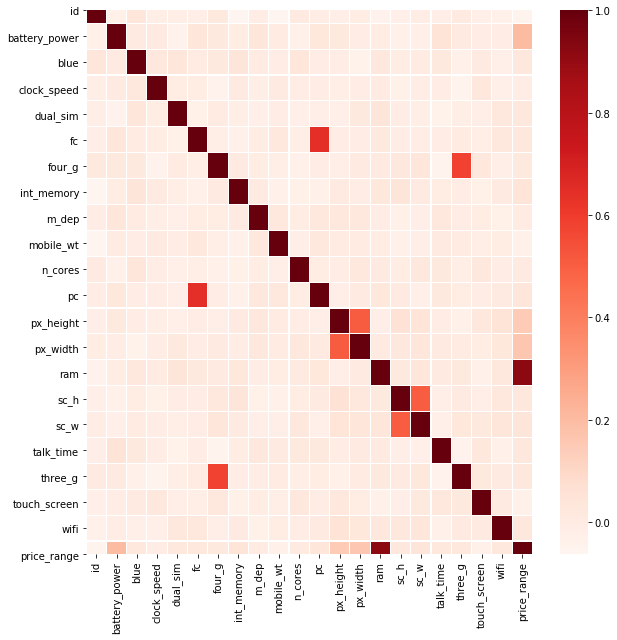

In [21]:
# Checking coreleation.
correlation=data1.corr() 
f,ax=plt.subplots(figsize =(10,10)) 
sns.heatmap(correlation, ax = ax, cmap ="Reds", linewidths = 0.1)

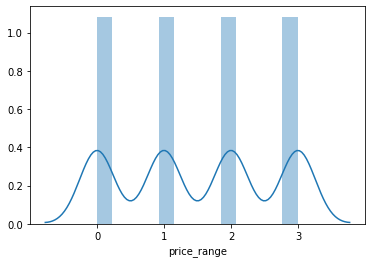

In [22]:
sns.distplot(data1['price_range'])

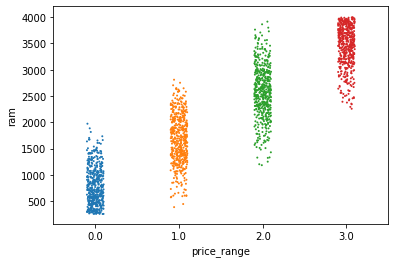

In [23]:
sns.stripplot(x="price_range", y="ram", data=data1, jitter=True, size=2)

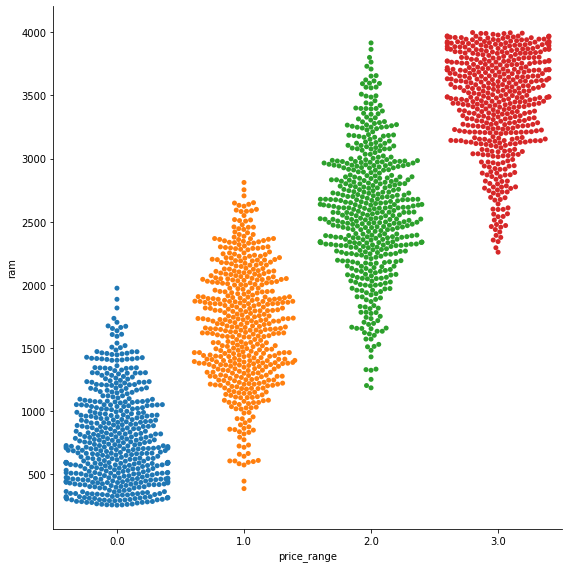

In [11]:
sns.catplot(x='price_range', y='ram', kind="swarm", data=data1, height=8)

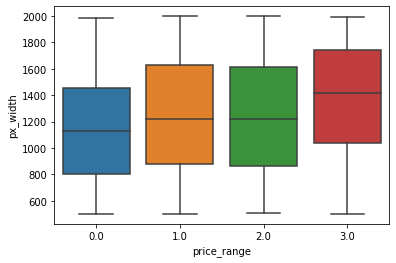

In [12]:
sns.boxplot('price_range','px_width',data=data1)

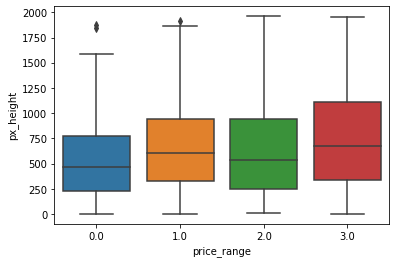

In [13]:
sns.boxplot('price_range','px_height',data=data1)

### Splitting the data.

In [14]:
X=data1.drop(['price_range','id'],axis=1)
y=data1['price_range']

In [15]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [16]:
y.head()

0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: price_range, dtype: float64

In [17]:
X.shape

(2000, 20)

In [18]:
y.shape

(2000,)

In [19]:
# Training and testing the data.
from sklearn.model_selection import train_test_split 

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [21]:
X_train.shape

(1500, 20)

In [22]:
X_test.shape

(500, 20)

In [23]:
y_train.shape

(1500,)

In [24]:
y_test.shape

(500,)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr', solver='liblinear', max_iter = 1500, random_state = 42)

In [26]:
model=lr.fit(X_train,y_train)

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred

array([0., 2., 0., 3., 1., 2., 2., 0., 3., 1., 0., 1., 1., 3., 3., 2., 3.,
       3., 1., 0., 0., 1., 2., 2., 0., 2., 3., 3., 2., 0., 0., 0., 3., 0.,
       2., 1., 2., 0., 3., 0., 2., 3., 3., 0., 2., 3., 1., 1., 3., 1., 3.,
       1., 0., 0., 1., 2., 1., 3., 0., 0., 1., 3., 3., 2., 1., 0., 3., 3.,
       2., 2., 2., 1., 0., 1., 3., 0., 1., 3., 2., 1., 3., 2., 1., 0., 1.,
       3., 2., 3., 3., 0., 3., 3., 2., 1., 3., 2., 2., 3., 2., 1., 0., 0.,
       1., 0., 0., 3., 2., 0., 1., 1., 0., 0., 3., 1., 3., 1., 3., 3., 0.,
       2., 1., 3., 3., 2., 3., 3., 0., 3., 0., 2., 3., 0., 1., 3., 0., 3.,
       1., 0., 0., 2., 3., 1., 3., 3., 0., 0., 0., 2., 2., 2., 3., 1., 1.,
       0., 2., 3., 0., 1., 0., 2., 2., 3., 3., 1., 1., 0., 0., 2., 2., 2.,
       3., 0., 0., 0., 3., 1., 2., 2., 1., 0., 0., 0., 0., 0., 3., 2., 0.,
       3., 0., 0., 0., 0., 1., 3., 3., 1., 0., 1., 2., 0., 1., 2., 1., 3.,
       3., 3., 1., 2., 0., 0., 0., 1., 1., 1., 3., 1., 1., 2., 1., 0., 3.,
       1., 3., 0., 0., 2.

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.metrics import classification_report

In [31]:
accuracy_score(y_test,y_pred)

0.79

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       132
         1.0       0.71      0.66      0.68       118
         2.0       0.68      0.58      0.63       120
         3.0       0.83      0.95      0.89       130

    accuracy                           0.79       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.79      0.78       500



### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree=DecisionTreeClassifier()

In [35]:
model=dtree.fit(X_train,y_train)

In [36]:
y_pred=model.predict(X_test)

In [37]:
y_pred.shape

(500,)

In [38]:
accuracy_score(y_test,y_pred)

0.816

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       132
         1.0       0.73      0.80      0.76       118
         2.0       0.76      0.69      0.72       120
         3.0       0.85      0.90      0.87       130

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc=RandomForestClassifier(n_estimators=600,max_depth=100,random_state=42)

In [42]:
model=rfc.fit(X_train,y_train)

In [43]:
y_pred=model.predict(X_test)

In [44]:
y_pred.shape

(500,)

In [45]:
accuracy_score(y_test,y_pred)

0.882

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       132
         1.0       0.83      0.87      0.85       118
         2.0       0.82      0.81      0.82       120
         3.0       0.92      0.90      0.91       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



### KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
model=knn.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [48]:
y_pred.shape

(500,)

In [49]:
accuracy_score(y_test,y_pred)

0.938

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       132
         1.0       0.89      0.94      0.91       118
         2.0       0.91      0.89      0.90       120
         3.0       0.99      0.93      0.96       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



### Conculsion

### KNN Model gives the best accuracy and f1 score.

##### Accuracy=.94
##### F1 Score=.94 
